# Cyclistic Bike-Share Capstone Project

## 1. Introduction

This case study is the **Capstone Project of the Google Data Analytics Professional Certificate**. In this case study, I am working as a junior data analyst in the marketing analyst team at **Cyclistic**, a fictional bike-share company in Chicago.

**Cyclistic** is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who cannot use a standard two-wheeled bike. The majority of riders opt for traditional bikes, while about **8% of riders use the assistive options**. Cyclistic users are more likely to ride for leisure, but **about 30% use them to commute to work each day**.

In **2016**, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of **5,824 bicycles** that are geotracked and locked into a network of **692 stations** across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

The director of marketing believes that the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how **casual riders** and **annual members** use Cyclistic bikes differently. From these insights, our team will design a new marketing strategy to convert casual riders into annual members. However, the Cyclistic executives must first approve our recommendations, which must be backed up with **compelling data insights** and **professional data visualizations**.

There are **three pricing plans**:
- Single-ride passes
- Full-day passes
- Annual memberships

Customers who purchase single-ride or full-day passes are referred to as **casual riders**, while customers who purchase annual memberships are called **Cyclistic members**.

To answer the key business questions, I followed the steps of the data analysis process: **ask, prepare, process, analyze, share, and act**.

---

## 2. Ask

**Key Question:**
  
- How do annual members and casual riders use Cyclistic bikes differently?


**Key Stakeholders:**
- Lily Moreno, the director of marketing and my manager.
- Cyclistic executive team.

### Goal:
First, the Cyclistic executive team must approve our recommendations, which need to be backed up with **data insights** and **data visualizations**.

From the insights of my analysis, the team will design a new marketing strategy to convert casual riders into annual members.

---

## 3. Prepare

**Data Used:**
- Cyclistic’s **Historical Trip Data** to analyze and identify trends.

**Timeframe:**
- The **previous 12 months** of data from **January 1 2023, to December 31, 2023**.

**Data Structure:**
- The data is stored in **CSV files**. Each file contains **one month's data**, making a total of **12 .csv files**.

**Data Organization:**
- The data is **structured** and organized.

**Dataset Considerations:**
- The datasets have a different name because Cyclistic is a fictional company. However, for the purposes of this case study, the datasets are appropriate.
- The data has been made available by **Motivate International Inc.** under a license.

**Data Reliability:**
- As this data is collected by a real bike-sharing company in Chicago, there are no issues with bias or credibility. The data is **Reliable, Original, Current, and Cited** (ROCCC).
- Although it is **comprehensive**, the data lacks some important information, such as financial data.

**Data Integrity:**
- The data is **Accurate**, **Consistent**, and **Trustworthy**.

### Limitations:

- **Data Privacy**: The data-privacy issues prohibit me from using riders’ personally identifiable information (PII). This means that I cannot connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.
- **Financial Information**: The financial information, such as the fare for each ride, is not available.
- If **personally identifiable information** and **financial information** were available, I could have calculated whether casual riders spent more money on individual rides than they would have if they opted for annual memberships.
- This dataset does not include data on the use of **reclining bikes, hand tricycles, and cargo bikes**, which account for 8% of total riders.

---


## PROCESS

In [36]:
# Importing the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [37]:

# List of file paths: Each CSV file represents one month's worth of trip data from January to Decembe
files = [
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202301-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202302-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202303-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202304-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202305-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202306-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202307-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202308-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202309-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202310-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202311-divvy-tripdata.csv",
    "C:\\Users\\dangw\\Desktop\\Capstone_Project\\Cyclistic_Case_Study\\202312-divvy-tripdata.csv"
]

# We are reading each CSV file into a pandas DataFrame, then concatenating them (combining all into one DataFrame)
combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Exporting the combined DataFrame (all 12 months of data) into a single CSV file called 'yearly_tripdata.csv'

combined_df.to_csv('yearly_tripdata.csv', index=False) 

In [38]:
# Reading the combined CSV file (yearly_tripdata.csv) into a pandas DataFrame
df = pd.read_csv(r"yearly_tripdata.csv", encoding= 'unicode_escape')

# Displaying the first 5 rows of the DataFrame to get a quick look at the data
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [39]:
# Getting the overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [40]:
# This will display the number of rows and columns in the DataFrame
df.shape

(5719877, 13)

In [41]:
# Check for null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [42]:
# Checking Duplicate values
df.duplicated().sum()

0

In [43]:
# Dropping columns that are not relevant for the analysis
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],errors= 'ignore')

# Display the remaining columns
df.head()


,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member


In [44]:
# Checking cloumns after removing
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual'], dtype='object')

## ANALYZE

### Data Transform

**In this step, we will change the data format and add new columns to make analysis easier later**


In [45]:
# Convert the 'started_at' and 'ended_at' columns to datetime format for easier date and time manipulation
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')


In [46]:
# Display rows where 'started_at' or 'ended_at' contains NaT
df[df['started_at'].isna() | df['ended_at'].isna()]

,ride_id,rideable_type,started_at,ended_at,member_casual
3929802,011C1903BF4E2E28,classic_bike,NaT,NaT,member
3929803,87DB80E048A1BF9F,classic_bike,NaT,NaT,member
3929804,7C2EB7AF669066E3,electric_bike,NaT,NaT,member
3929805,57D197B010269CE3,classic_bike,NaT,NaT,member
3929806,8A2CEA7C8C8074D8,classic_bike,NaT,NaT,member
...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,NaT,NaT,casual
5719873,BCDA66E761CC1029,classic_bike,NaT,NaT,casual
5719874,D2CF330F9C266683,classic_bike,NaT,NaT,member
5719875,3829A0D1E00EE970,electric_bike,NaT,NaT,casual


In [47]:
# Remove rows where 'started_at' or 'ended_at' contains NaT
df= df.dropna(subset=['started_at', 'ended_at'])
# After Remove
df[df['started_at'].isna() | df['ended_at'].isna()]

,ride_id,rideable_type,started_at,ended_at,member_casual


In [48]:
# Calculate the length of each ride in minutes
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,15.316667


In [49]:
# Sort the DataFrame by the 'ride_length' column in ascending order
df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
2038668,8B6E5BA70093AAB7,electric_bike,2023-06-02 19:29:06,2023-06-02 18:28:51,casual,-60.250000
3511986,DC4C145C46A1C4B2,electric_bike,2023-08-12 15:15:32,2023-08-12 14:26:00,casual,-49.533333
2038713,D12C3767DC204369,electric_bike,2023-06-02 19:29:42,2023-06-02 18:40:44,casual,-48.966667
3507619,ABB6B0F56CAD19B4,electric_bike,2023-08-12 14:30:04,2023-08-12 14:08:15,member,-21.816667
2309448,318E29DFACCD7C24,electric_bike,2023-06-02 23:26:45,2023-06-02 23:10:38,member,-16.116667
...,...,...,...,...,...,...
3863256,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,casual,64171.700000
3829955,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,casual,79775.016667
3288083,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,casual,83382.583333
3188701,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,casual,92569.916667


In [50]:
#  Check Number of rows containing Negative Values.
df[df['ride_length'] < 1].count()

ride_id          111438
rideable_type    111438
started_at       111438
ended_at         111438
member_casual    111438
ride_length      111438
dtype: int64

In [51]:
# Remove entries with ride length less than 1 minute.
df = df[df['ride_length'] >= 1]
df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
1927095,440F7E6214FB655B,classic_bike,2023-06-05 07:50:17,2023-06-05 07:51:17,member,1.000000
188463,1CB76579ED5E3C36,classic_bike,2023-01-30 17:30:59,2023-01-30 17:31:59,member,1.000000
350992,E20BDC6FACE7BB80,classic_bike,2023-02-19 14:05:57,2023-02-19 14:06:57,member,1.000000
2341280,2C9ACAEAF4A12D86,electric_bike,2023-06-10 01:41:09,2023-06-10 01:42:09,casual,1.000000
224179,3B60A2DF85FE88ED,electric_bike,2023-02-26 17:18:50,2023-02-26 17:19:50,member,1.000000
...,...,...,...,...,...,...
3863256,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,casual,64171.700000
3829955,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,casual,79775.016667
3288083,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,casual,83382.583333
3188701,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,casual,92569.916667


In [52]:
# Create a new column 'day_of_week'
df['day_of_week'] = (df['started_at'].dt.weekday + 1) % 7
df['day_of_week'] = df['day_of_week'].replace(0, 7)
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.850000,6
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,8.483333,2
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,13.233333,1
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,8.766667,7
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,15.316667,4


##  ANALYZE

In [53]:
# Calculate the average of ride_length
df['ride_length'].mean()

19.804373461164694

In [54]:
# Calculate the maximum ride_length
df['ride_length'].max()

98489.06666666667

In [55]:
# Calculate the minimum ride_length
df['ride_length'].min()

1.0

In [56]:
# Calculate the mode of day_of_week
df['day_of_week'].mode()[0]

6

In [57]:
# To get a summary of the descriptive analysis on ride length
df['ride_length'].describe()

count    3.818364e+06
mean     1.980437e+01
std      2.168151e+02
min      1.000000e+00
25%      5.833333e+00
50%      1.010000e+01
75%      1.785000e+01
max      9.848907e+04
Name: ride_length, dtype: float64

In [58]:
# Compare the ride length of members and casual users
df.groupby('member_casual')['ride_length'].mean().reset_index()

,member_casual,ride_length
0,casual,31.129784
1,member,13.022106


In [59]:
# Calculate the median ride length for each user type ('member' or 'casual')
df.groupby('member_casual')['ride_length'].median().reset_index()

,member_casual,ride_length
0,casual,12.666667
1,member,8.916667


In [60]:
# Find the maximum ride length for each user type ('member' or 'casual')
df.groupby('member_casual')['ride_length'].max()

member_casual
casual    98489.066667
member     1559.666667
Name: ride_length, dtype: float64

In [61]:
# Find the manimum ride length for each user type ('member' or 'casual')
df.groupby('member_casual')['ride_length'].min()

member_casual
casual    1.0
member    1.0
Name: ride_length, dtype: float64

In [62]:
# Calculate the average ride length for each combination of user type ('member' or 'casual') and day of the week
df.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

,member_casual,day_of_week,ride_length
0,casual,1,30.515476
1,casual,2,27.992255
2,casual,3,27.022629
3,casual,4,27.403703
4,casual,5,30.188260
5,casual,6,35.633911
6,casual,7,35.648549
7,member,1,12.367958
8,member,2,12.535206
9,member,3,12.328012


In [63]:
# Analyze ridership by type and weekday (number of rides and average ride length)
df['weekday'] = pd.to_datetime(df['started_at']).dt.day_name()

df.groupby(['member_casual', 'weekday']).agg(
    number_of_rides=('ride_length', 'size'),
    average_duration=('ride_length', 'mean')
).reset_index().sort_values(['member_casual', 'weekday'])


,member_casual,weekday,number_of_rides,average_duration
0,casual,Friday,217437,30.188260
1,casual,Monday,164067,30.515476
2,casual,Saturday,281222,35.633911
3,casual,Sunday,225776,35.648549
4,casual,Thursday,191748,27.403703
5,casual,Tuesday,175624,27.992255
6,casual,Wednesday,174302,27.022629
7,member,Friday,343797,13.016720
8,member,Monday,323901,12.367958
9,member,Saturday,304633,14.628623


In [64]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual',
       'ride_length', 'day_of_week', 'weekday'],
      dtype='object')

## SHARE

### The Number Of Rides By Rider Type

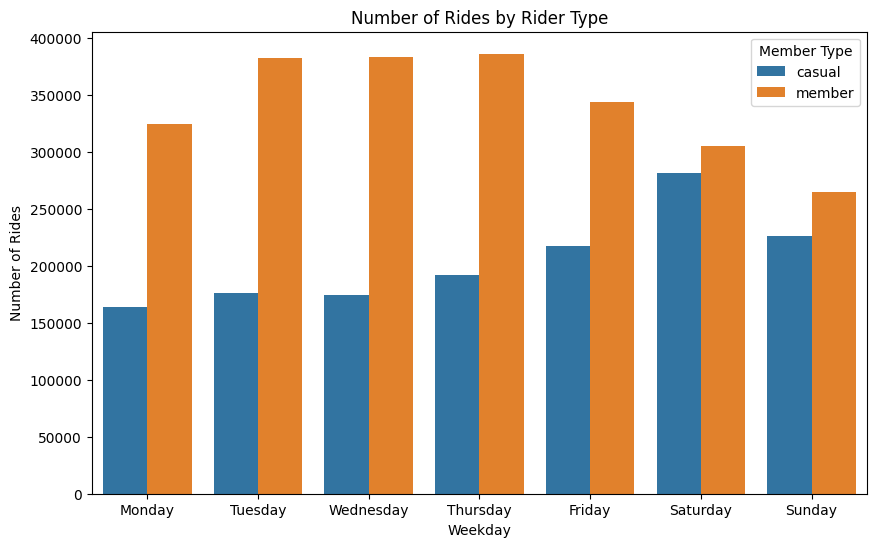

In [65]:
# Define weekday order and convert to categorical
df['weekday'] = pd.Categorical(df['started_at'].dt.day_name(), 
                                categories=['Monday', 'Tuesday', 'Wednesday', 
                                            'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                ordered=True)

# Create the summary table and plot
summary = (df.groupby(['member_casual', 'weekday'], observed=True)
           .agg(number_of_rides=('ride_length', 'size'), average_duration=('ride_length', 'mean'))
           .reset_index()
           .sort_values(by=['member_casual', 'weekday']))

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='weekday', y='number_of_rides', hue='member_casual', dodge=True)
plt.title('Number of Rides by Rider Type')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.legend(title='Member Type')
plt.show()


### Average Duration of Rides by Rider Type

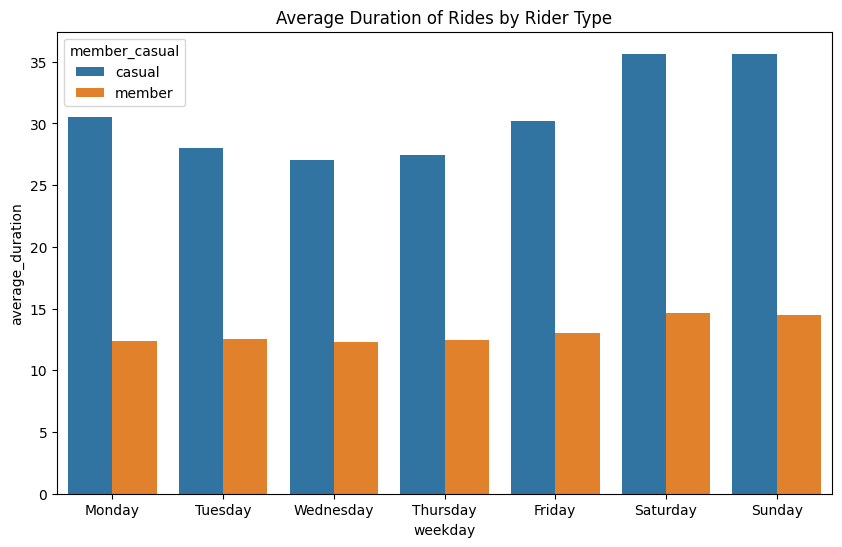

In [66]:
# Set weekday order and convert to categorical
df['weekday'] = pd.Categorical(df['started_at'].dt.day_name(),
                                         categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                     'Friday', 'Saturday', 'Sunday'], ordered=True)

# Group by member type and weekday, aggregate ride count and duration
summary = df.groupby(['member_casual', 'weekday'], observed=True).agg(
    number_of_rides=('ride_length', 'size'),
    average_duration=('ride_length', 'mean')).reset_index()

# Plot average duration of rides by rider type
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='weekday', y='average_duration', hue='member_casual', dodge=True)
plt.title('Average Duration of Rides by Rider Type')
plt.show()


### Conclusions

#### 1. Average Duration of Rides by Rider Type
- **Casual riders** consistently have longer average ride durations compared to members across all days of the week.
- The average duration of casual riders’ trips peaks on weekends (Saturday and Sunday), reaching over 35 minutes.
- **Members** have a steady average ride duration of around 10 to 15 minutes throughout the week, with minimal variation between weekdays and weekends.

---

### Number Rides by Weekday 

C:\Users\dangw\AppData\Local\Temp\ipykernel_31784\2631291617.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ride_counts, x='weekday', y='number_of_rides',palette='viridis')


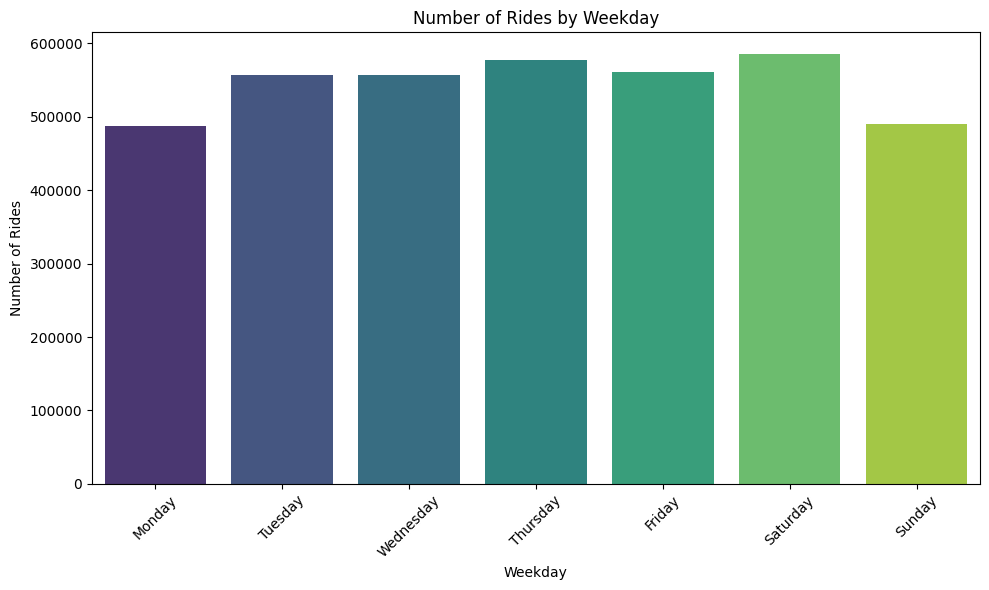

In [85]:
# Define weekday order and convert to categorical
df['weekday'] = pd.Categorical(df['started_at'].dt.day_name(), 
                                categories=['Monday', 'Tuesday', 'Wednesday', 
                                            'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                ordered=True)

# Create the summary table for the number of rides
ride_counts = df['weekday'].value_counts().sort_index().reset_index()
ride_counts.columns = ['weekday', 'number_of_rides']

# Create the bar plot for the number of rides
plt.figure(figsize=(10, 6))
sns.barplot(data=ride_counts, x='weekday', y='number_of_rides',palette='viridis')
plt.title('Number of Rides by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Conclusions

#### 2. Number of Rides by Weekday
- The number of rides peaks on **Saturday**, followed by Friday and Thursday.
- **Sunday** has the lowest number of rides, indicating a lower ridership on that day.
- The overall number of rides is higher from **Tuesday to Saturday**.
----

### Average Ride Length by Weekday in minutes

C:\Users\dangw\AppData\Local\Temp\ipykernel_31784\2824085322.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='weekday', y='average_ride_length', palette='viridis' )


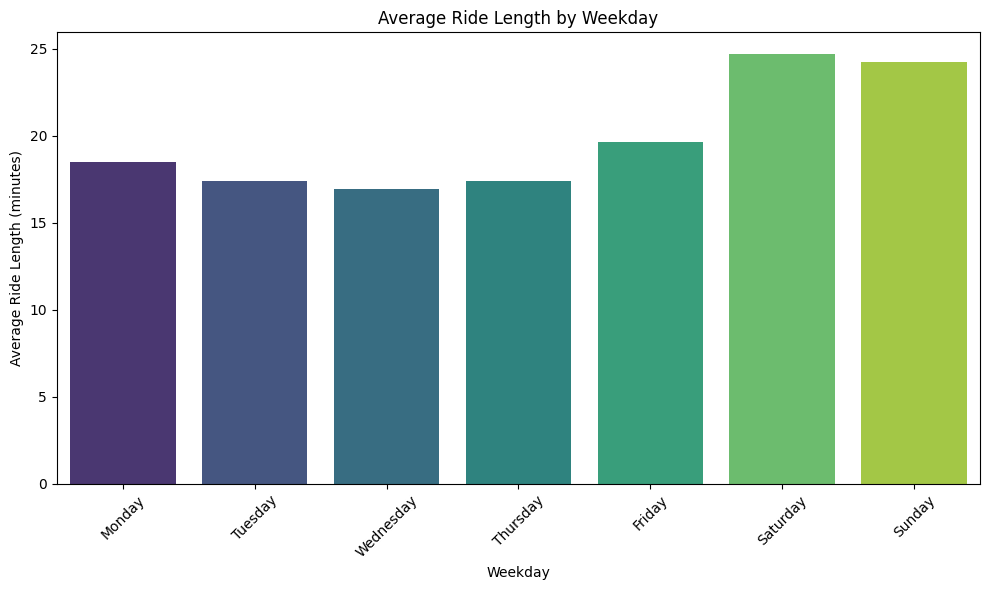

In [83]:
# Define weekday order and convert to categorical
df['weekday'] = pd.Categorical(df['started_at'].dt.day_name(), 
                                categories=['Monday', 'Tuesday', 'Wednesday', 
                                            'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                ordered=True)

# Create the summary table for average ride length
summary = (df.groupby('weekday', observed=True)
           .agg(average_ride_length=('ride_length', 'mean'))
           .reset_index())

# Create the bar plot without hue and palette
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='weekday', y='average_ride_length', palette='viridis' )
plt.title('Average Ride Length by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Ride Length (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Conclusions

#### 3. Average Ride Length by Weekday
- The **average ride length** increases noticeably on the weekends, with **Saturday** having the highest average ride length of about 25 minutes.
- On weekdays, the average ride length remains consistent, ranging between 15 to 18 minutes, suggesting shorter trips during weekdays, possibly due to commuting.
---

## ACT

### Overall Conclusion
- **Casual riders** tend to take longer trips, especially on weekends, likely for leisure or recreation.
- **Members** appear to use bikes for shorter, consistent trips throughout the week, possibly for commuting or daily activities.
- **Total ridership** is higher on weekdays, though ride durations tend to be longer during weekends.



### Recommendations

1. **Target Casual Riders with Weekend Promotions**:
   - Since casual riders take longer trips on weekends, Cyclistic could offer special weekend promotions or discounts to further encourage usage, such as extended ride durations for a flat fee.
   
2. **Introduce Membership Options for Recreational Riders**:
   - To convert casual riders into annual members, Cyclistic could introduce a membership tier designed specifically for those who use bikes for leisure, offering benefits like discounted weekend rides or packages for long-duration rides.

3. **Optimize Bike Availability on Weekdays**:
   - Given that members use bikes more consistently on weekdays for shorter trips, Cyclistic could ensure higher bike availability near commuter hubs during peak hours to support weekday commuters.

4. **Promote Off-Peak Hours for Member Riders**:
   - Cyclistic could encourage members to use bikes during non-peak hours or weekends by offering rewards or reduced fees for trips taken during these periods, ensuring a balanced distribution of bike availability.

5. **Expand Services on Saturdays**:
   - With Saturday showing the highest number of rides, Cyclistic could allocate more bikes and ensure maintenance teams are available to meet the increased demand on this day.
   
6. **Leverage Ride Data for Targeted Marketing**:
   - Cyclistic can use ride length and frequency data to segment and target different rider groups, offering personalized promotions to casual riders for converting them to members, and to existing members for boosting their weekend usage.

